In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import pandas_profiling as pdp
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
import pylab as pl


In [34]:
#فراخوانی دیتاست و تبدیلش به دیتافریم رو میشه اینجوری در یک خط نوشت

df=pd.DataFrame(pd.read_csv('Breast_Cancer.csv'))
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [35]:
# این فانکشن برای آن است که ما عنوان ستون ، تایپ آن و داده های یونیک و میزان میسینگ ولیو را مشاهده کنیم

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [36]:
check(df)


column  dtypes  nunique  sum_null
0                      Age   int64       40         0
1                     Race  object        3         0
2           Marital Status  object        5         0
3                 T Stage   object        4         0
4                  N Stage  object        3         0
5                6th Stage  object        5         0
6            differentiate  object        4         0
7                    Grade  object        4         0
8                  A Stage  object        2         0
9               Tumor Size   int64      110         0
10         Estrogen Status  object        2         0
11     Progesterone Status  object        2         0
12  Regional Node Examined   int64       54         0
13   Reginol Node Positive   int64       38         0
14         Survival Months   int64      107         0
15                  Status  object        2         0

# EDA:

In [37]:
for i in df.columns:
    fig = px.histogram(df, 
                   x=i, 
                   marginal='box', 
                   text_auto=True,
                   color_discrete_sequence  = ['lightblue'],
                   template='simple_white',
                   title=i.upper() + ' Histogram')

    fig.update_layout(xaxis_title=i,yaxis_title="Count", bargap=0.1)
    
    fig.show()

In [39]:
fig = px.sunburst(df, path=['Status','Race','Marital Status'], values='Age',color='Status')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
def fig (df,var):
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    fig2.show()

In [ ]:
for i in df.columns:
    fig (df,i)

In [ ]:
def countplot (df,var):  
    sns.countplot(data=df,x=var,hue='Status')
    sns.set(rc={'figure.figsize':(20,15)})
    plt.xticks(rotation=90)
    plt.show()

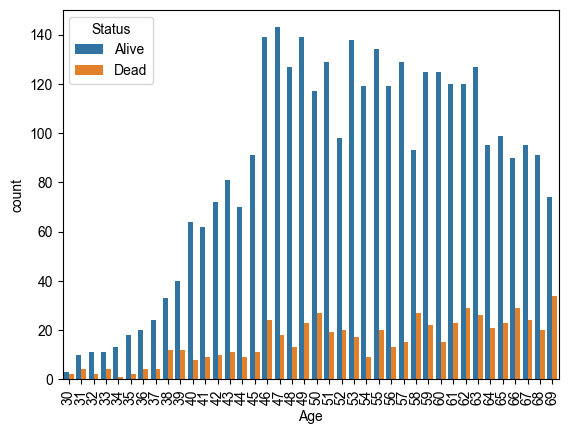

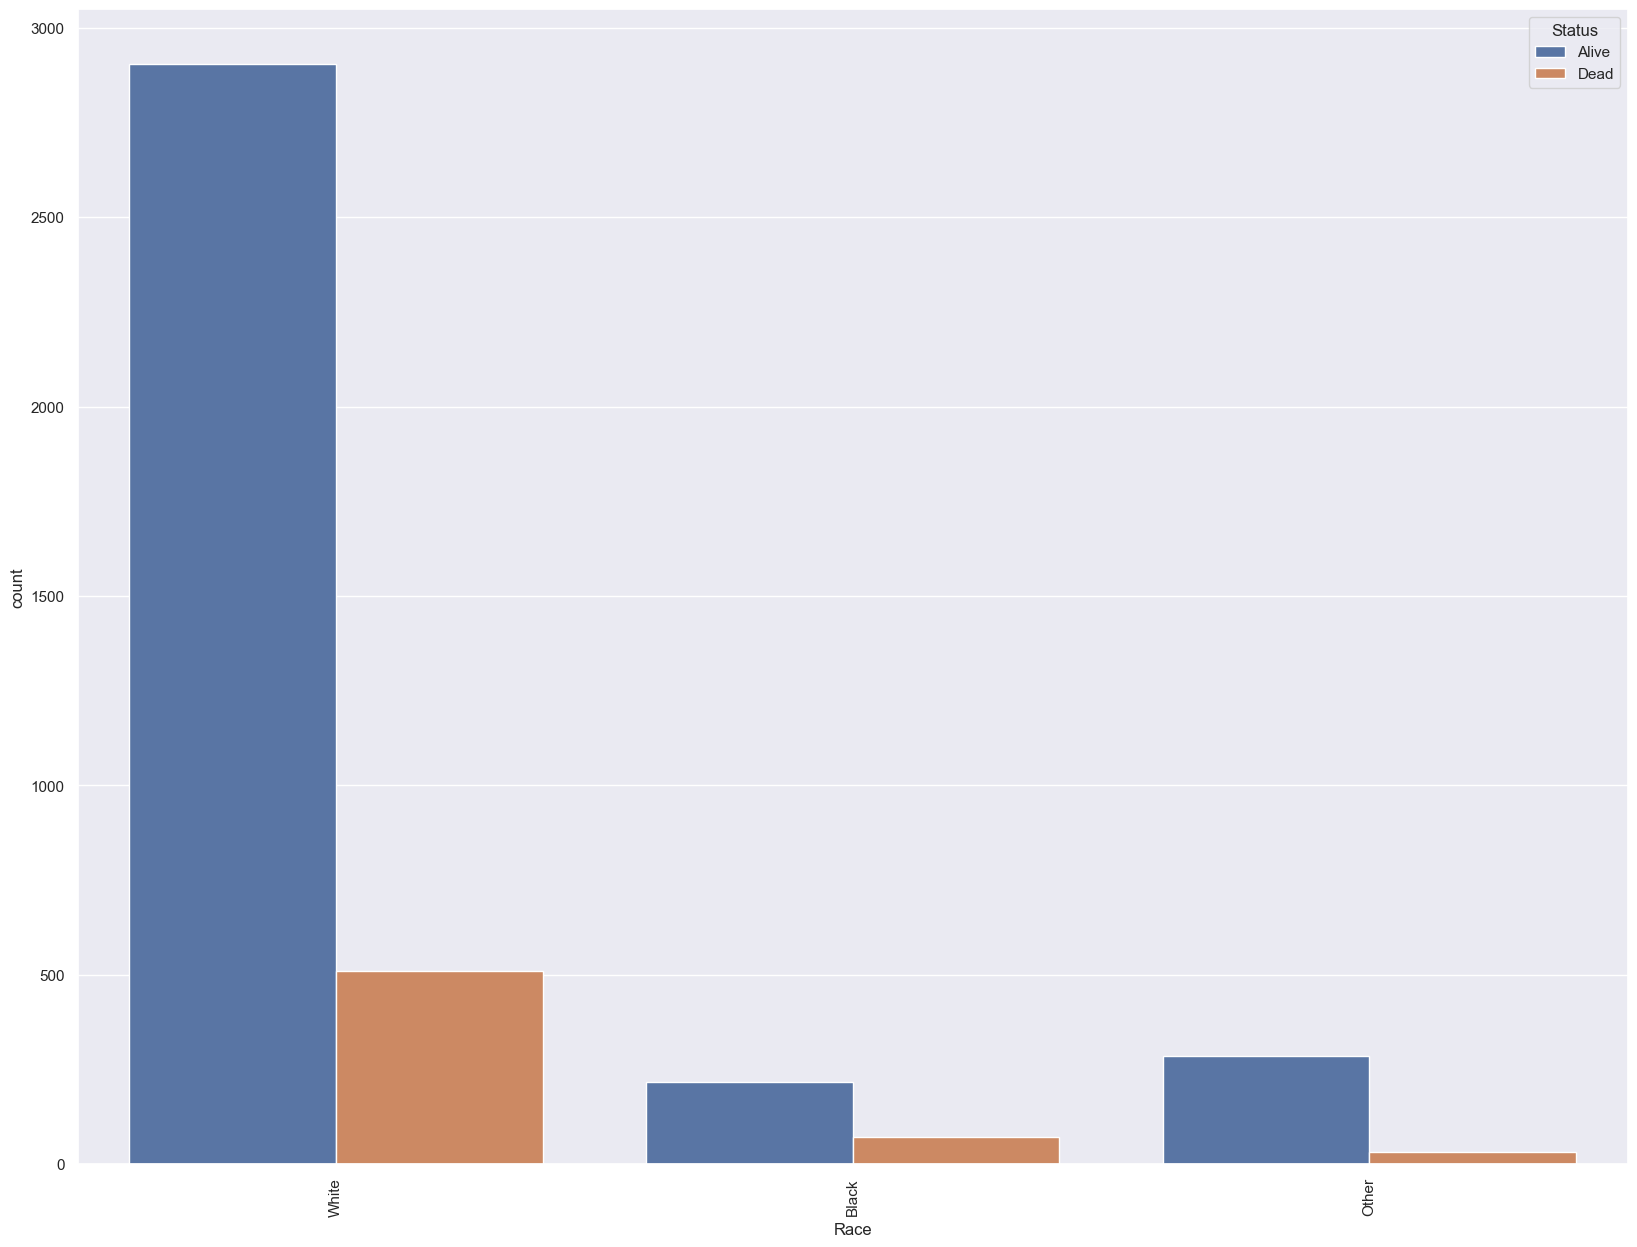

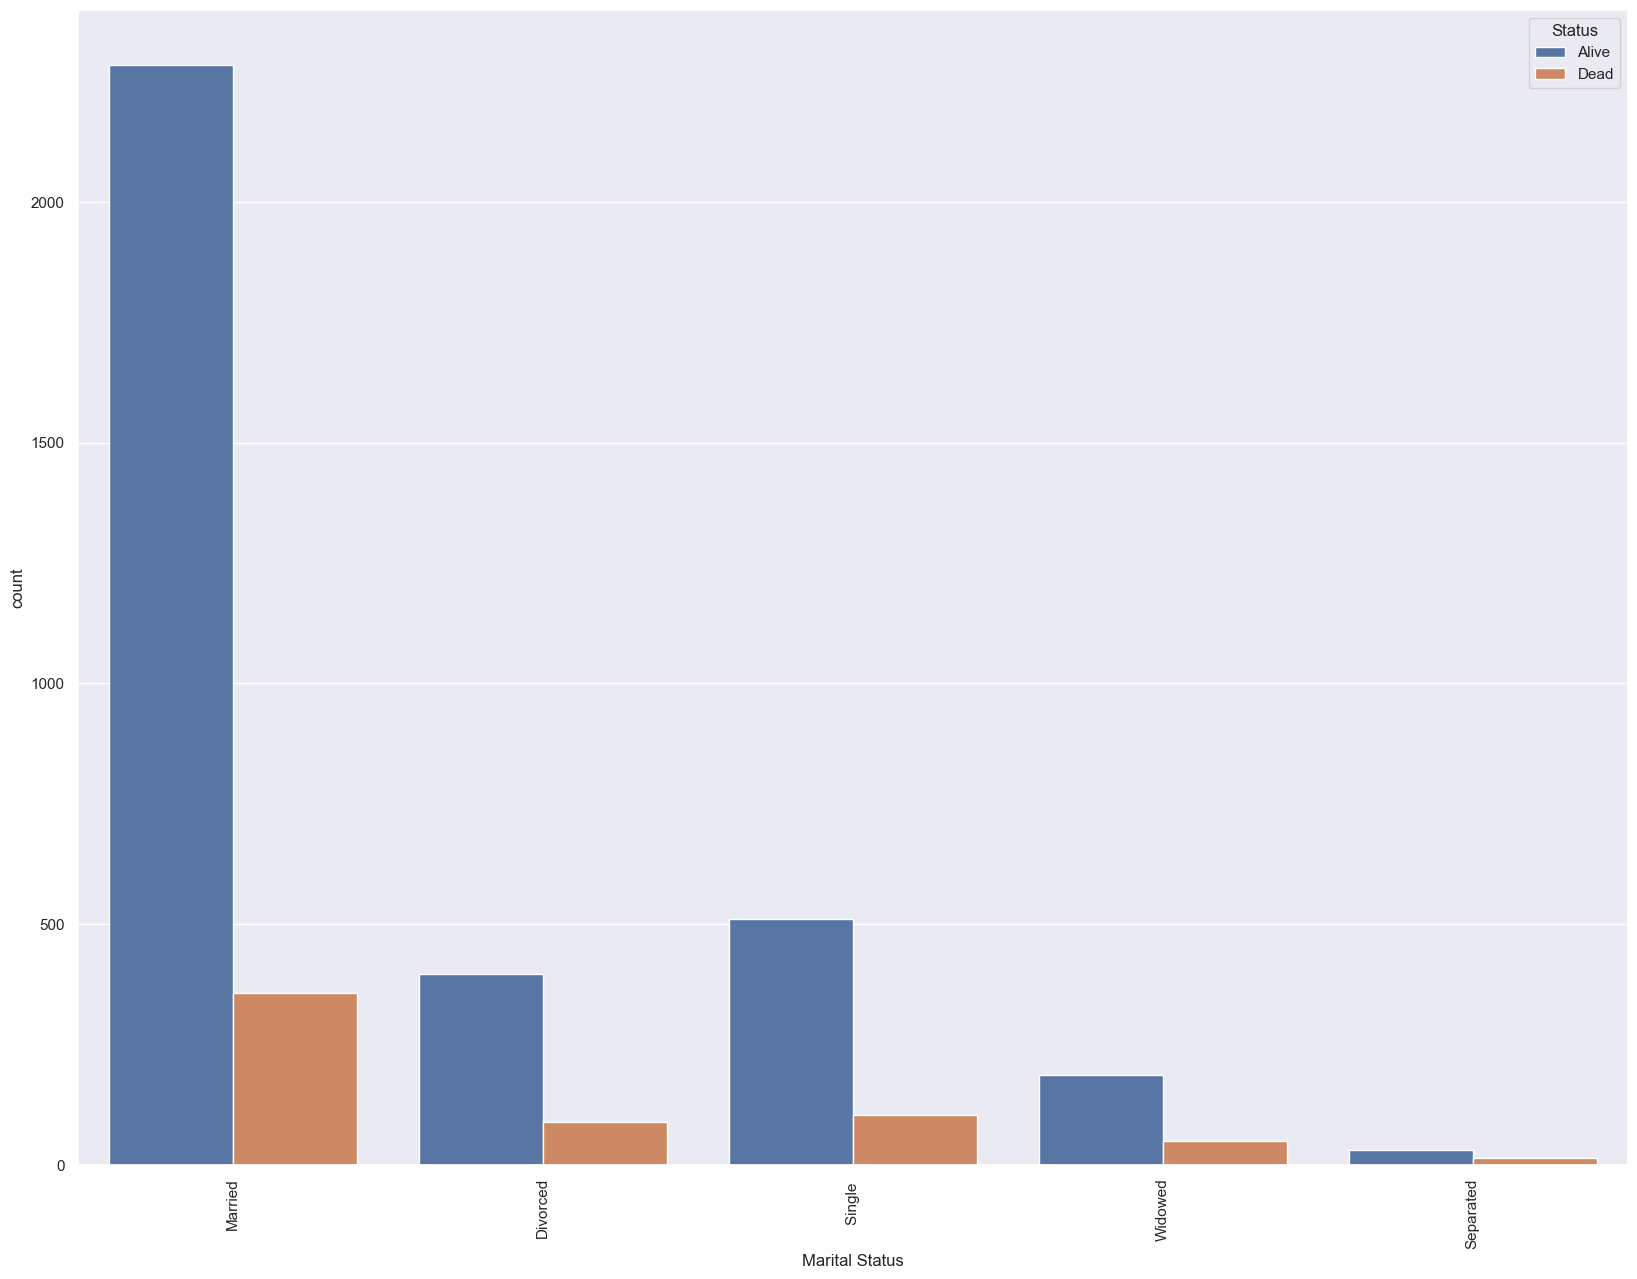

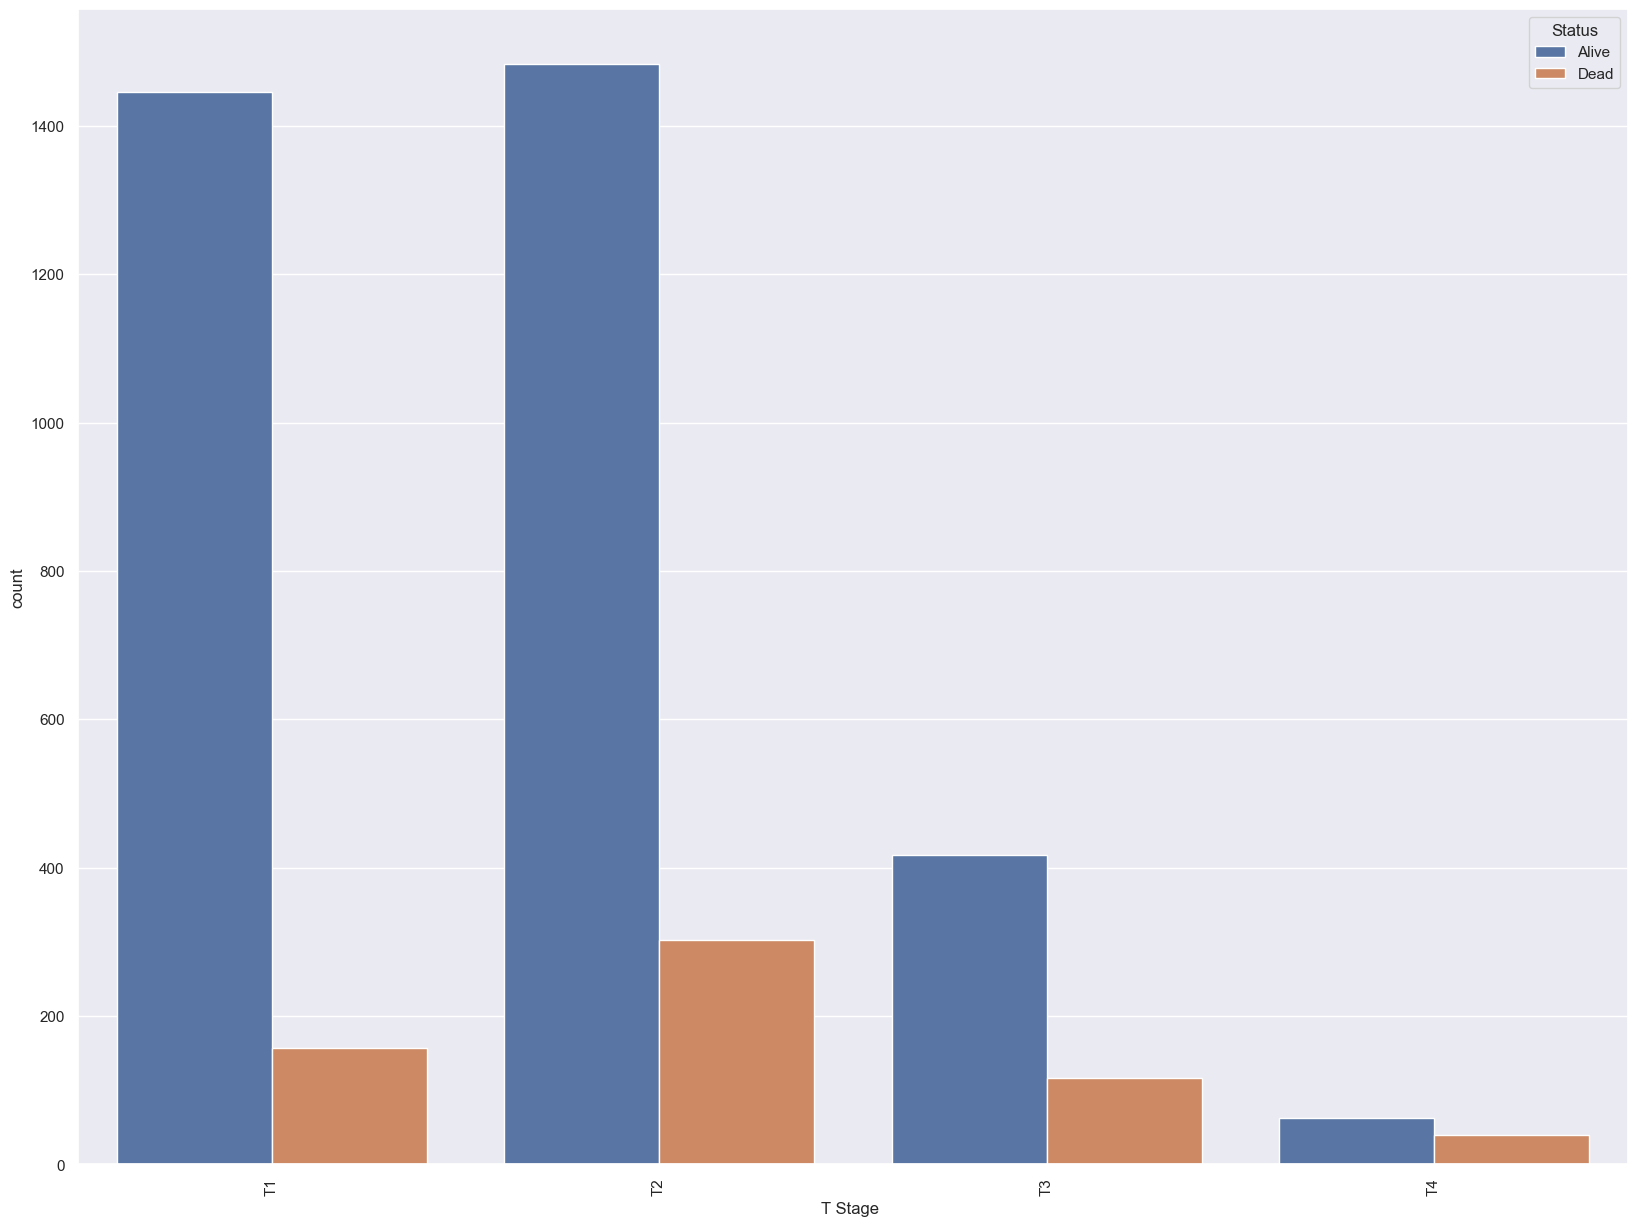

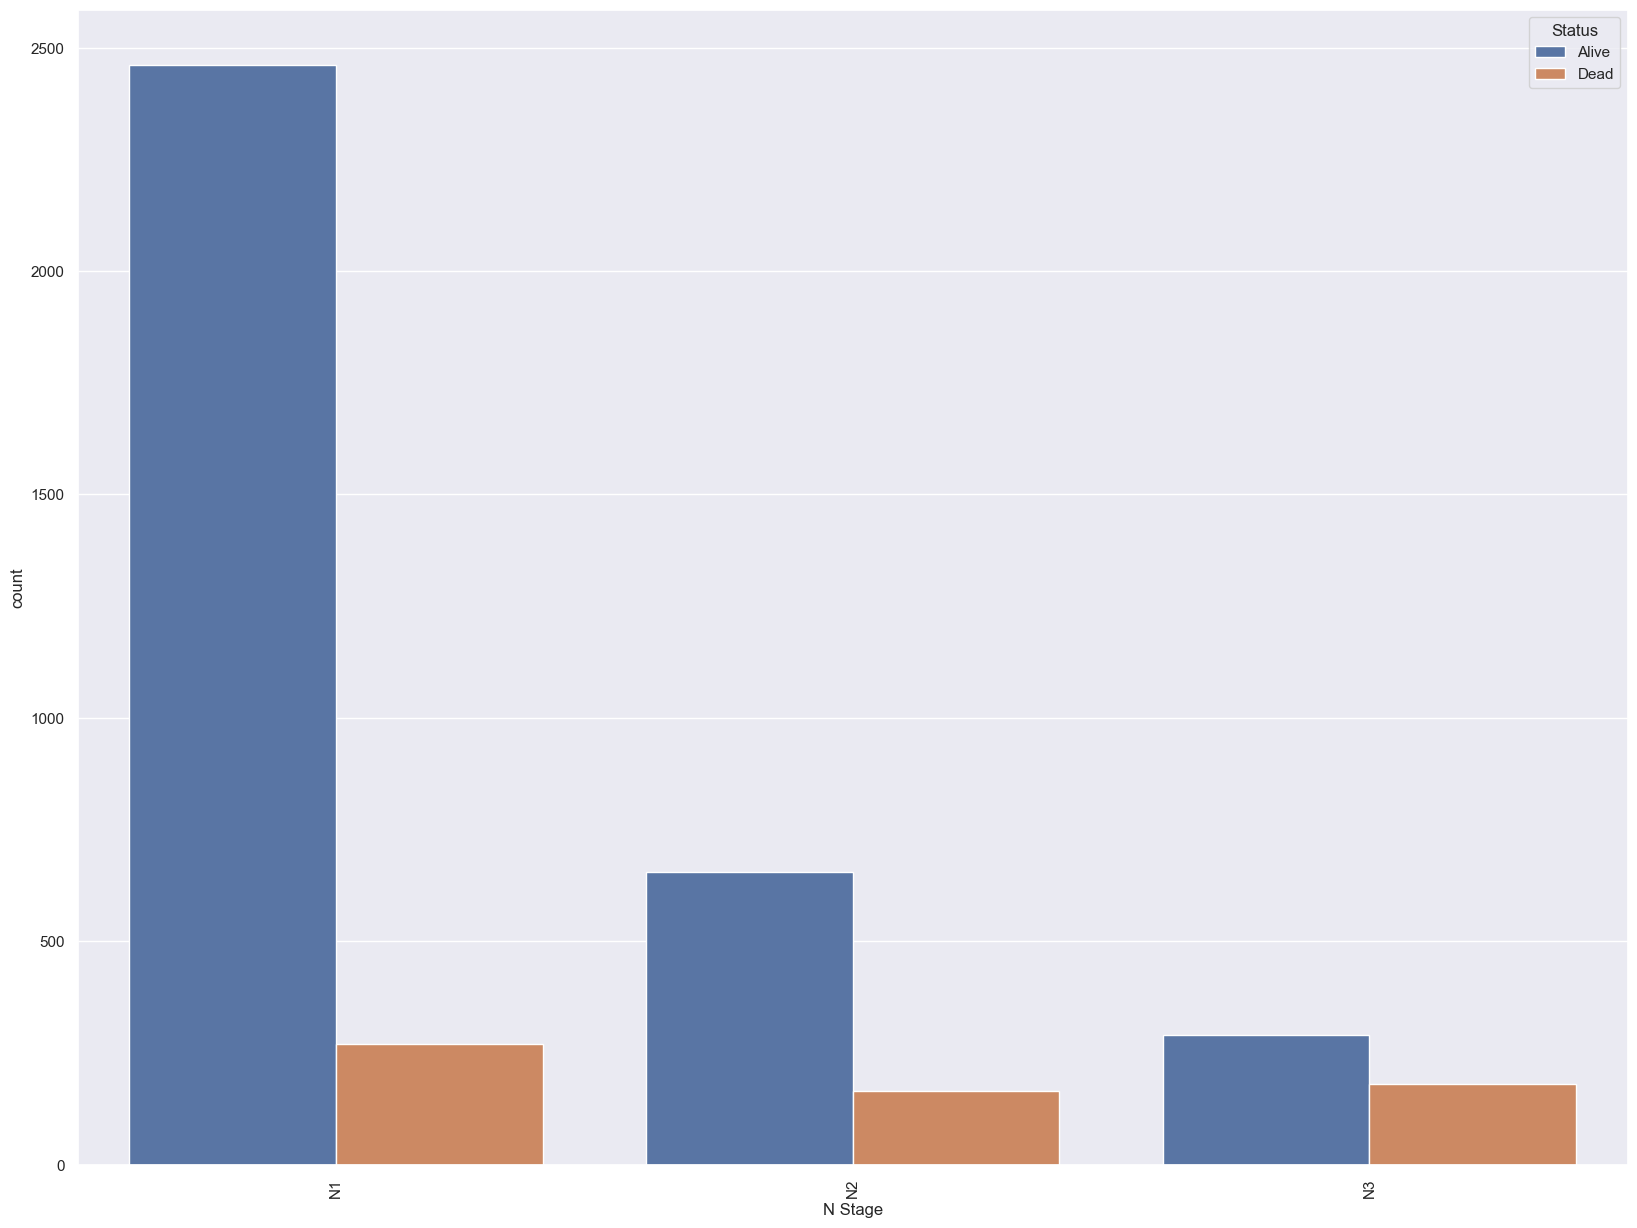

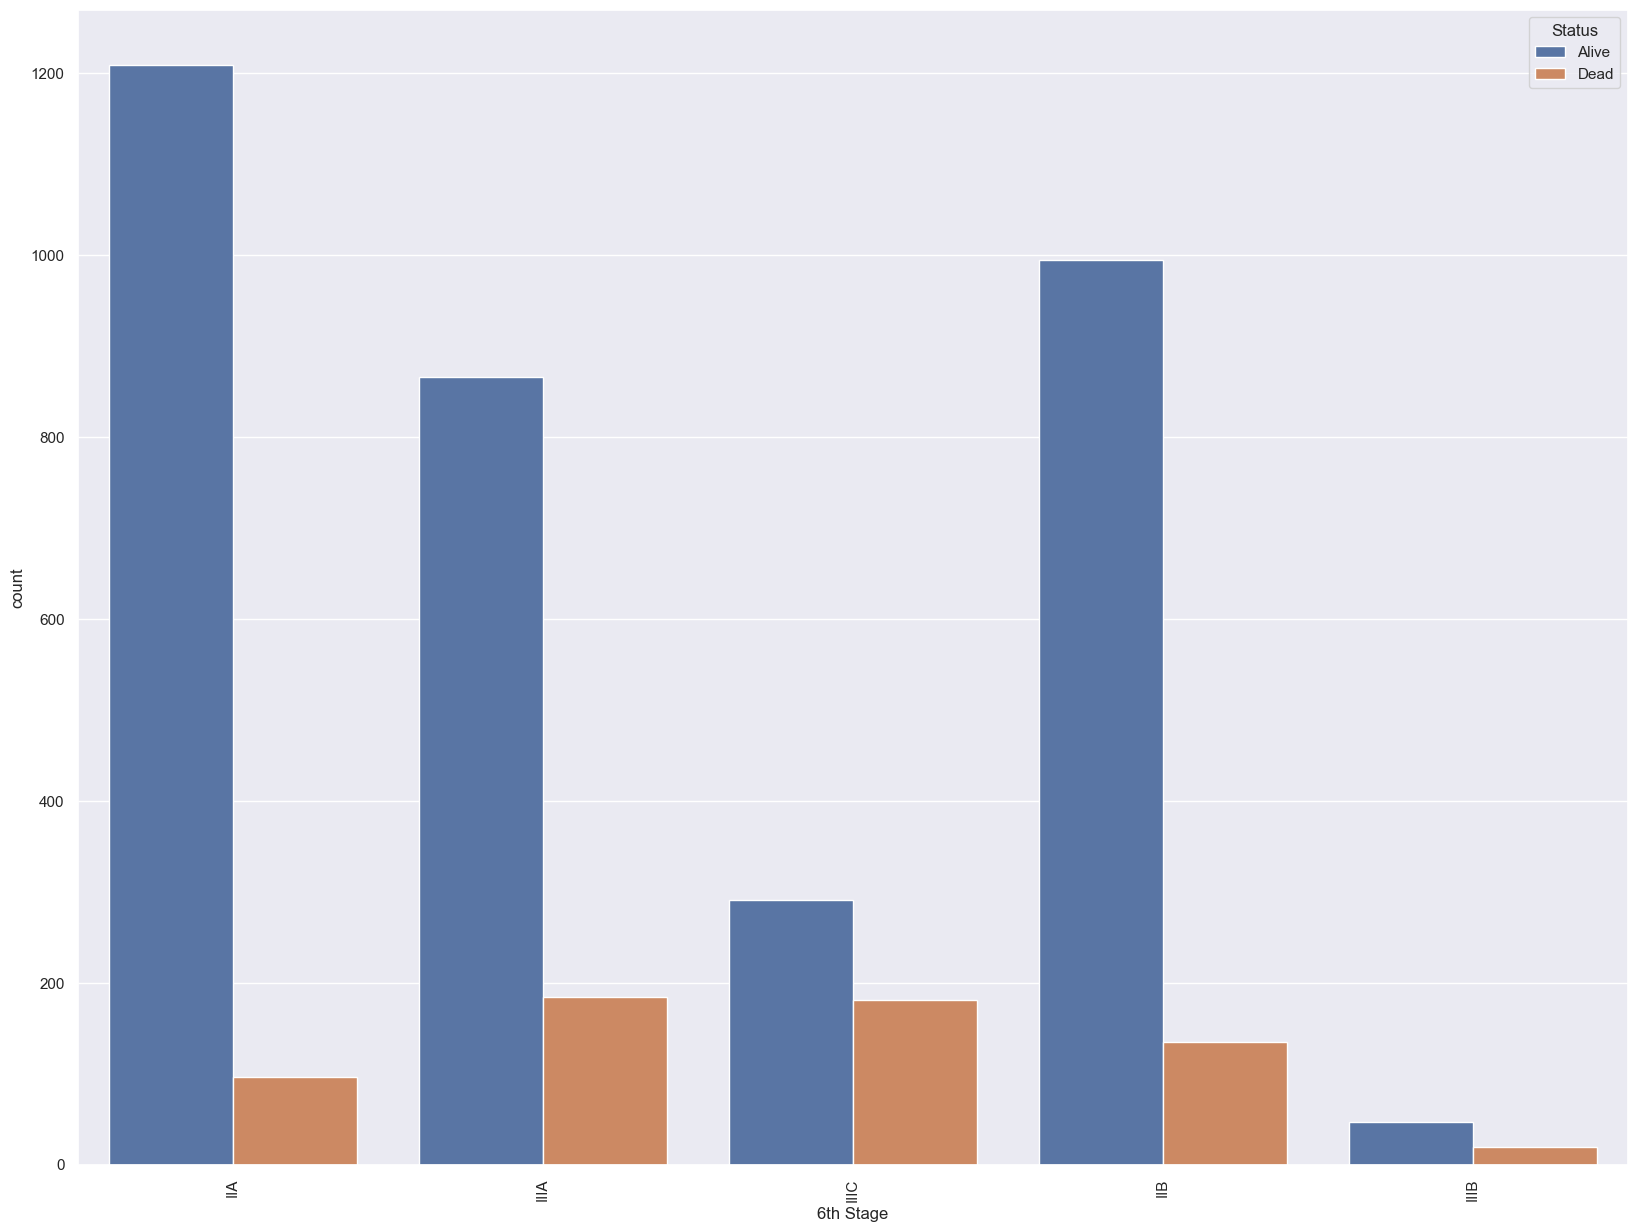

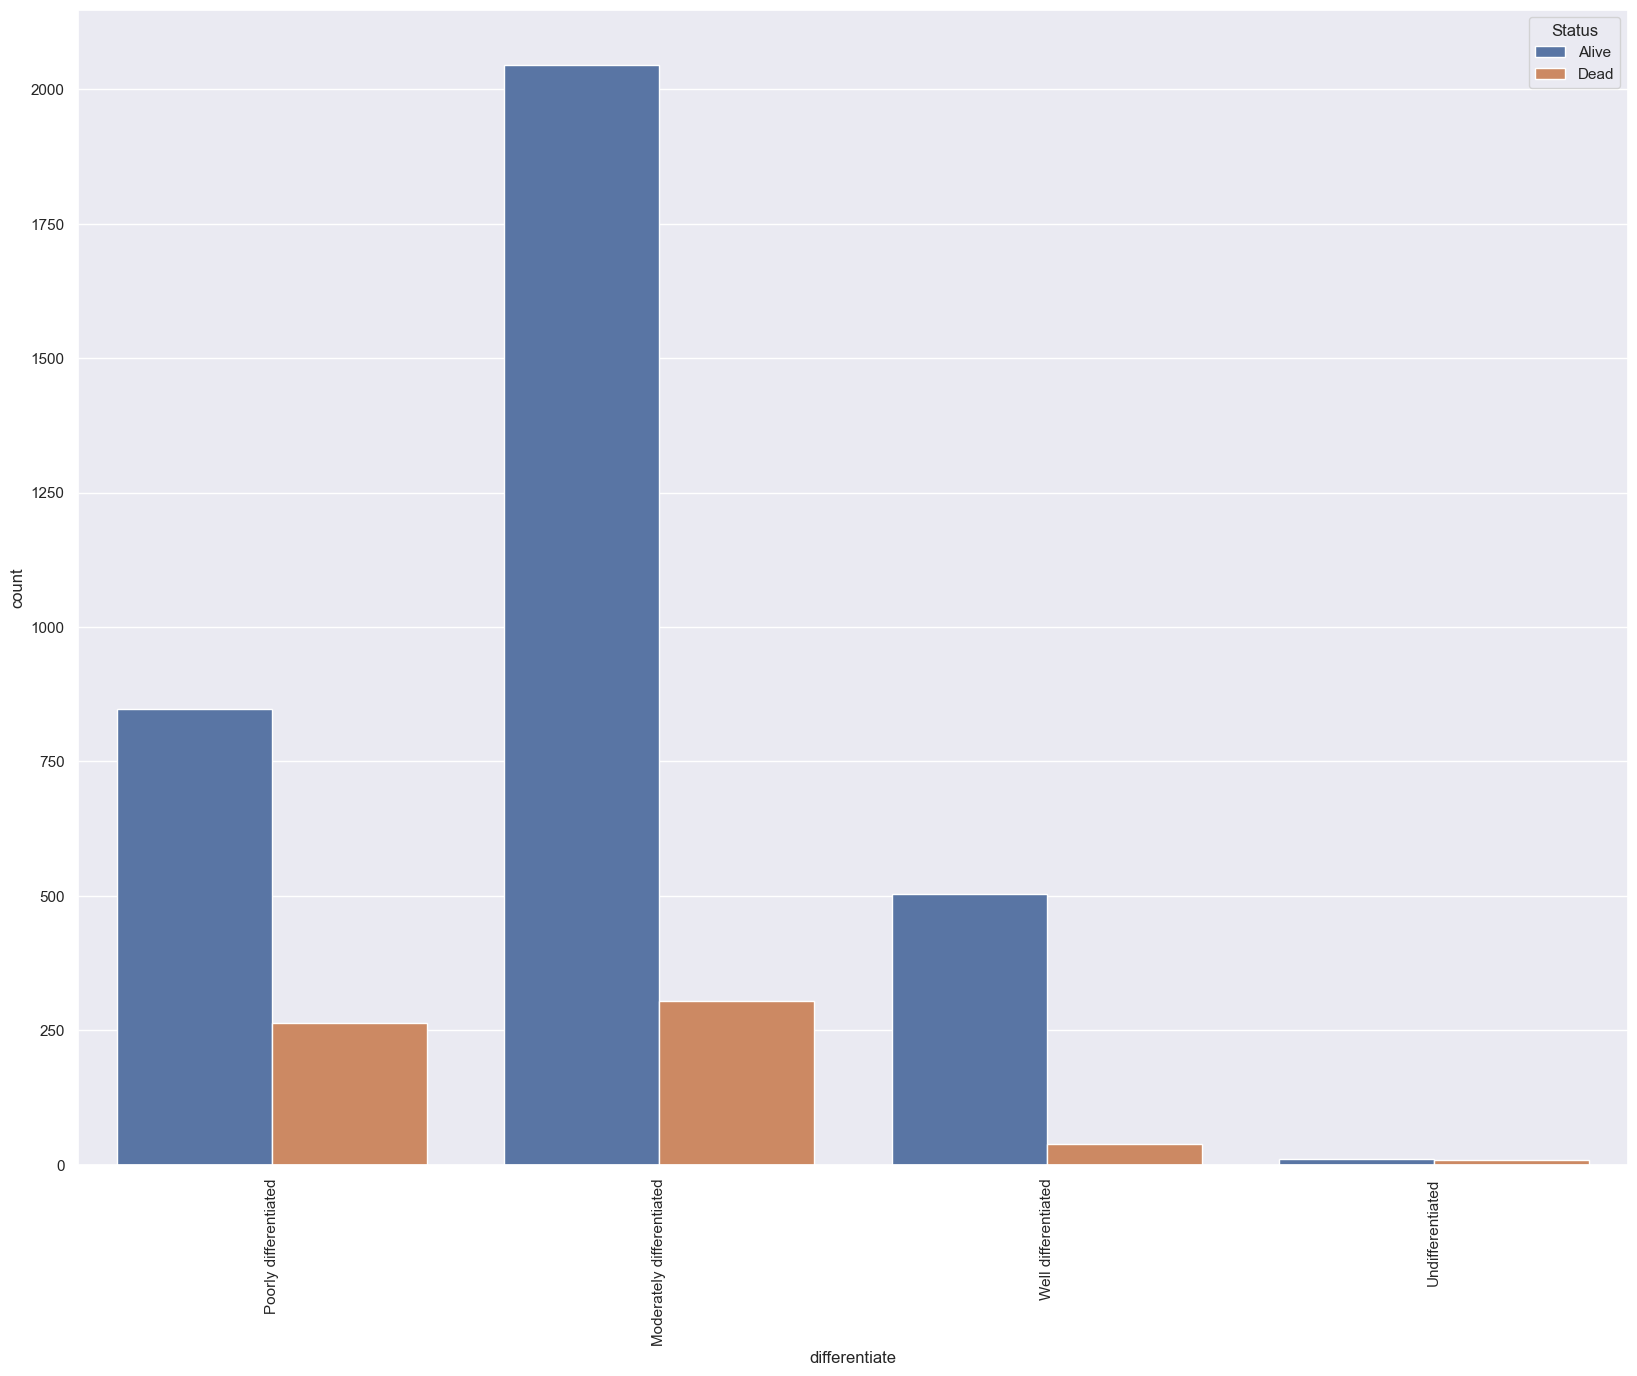

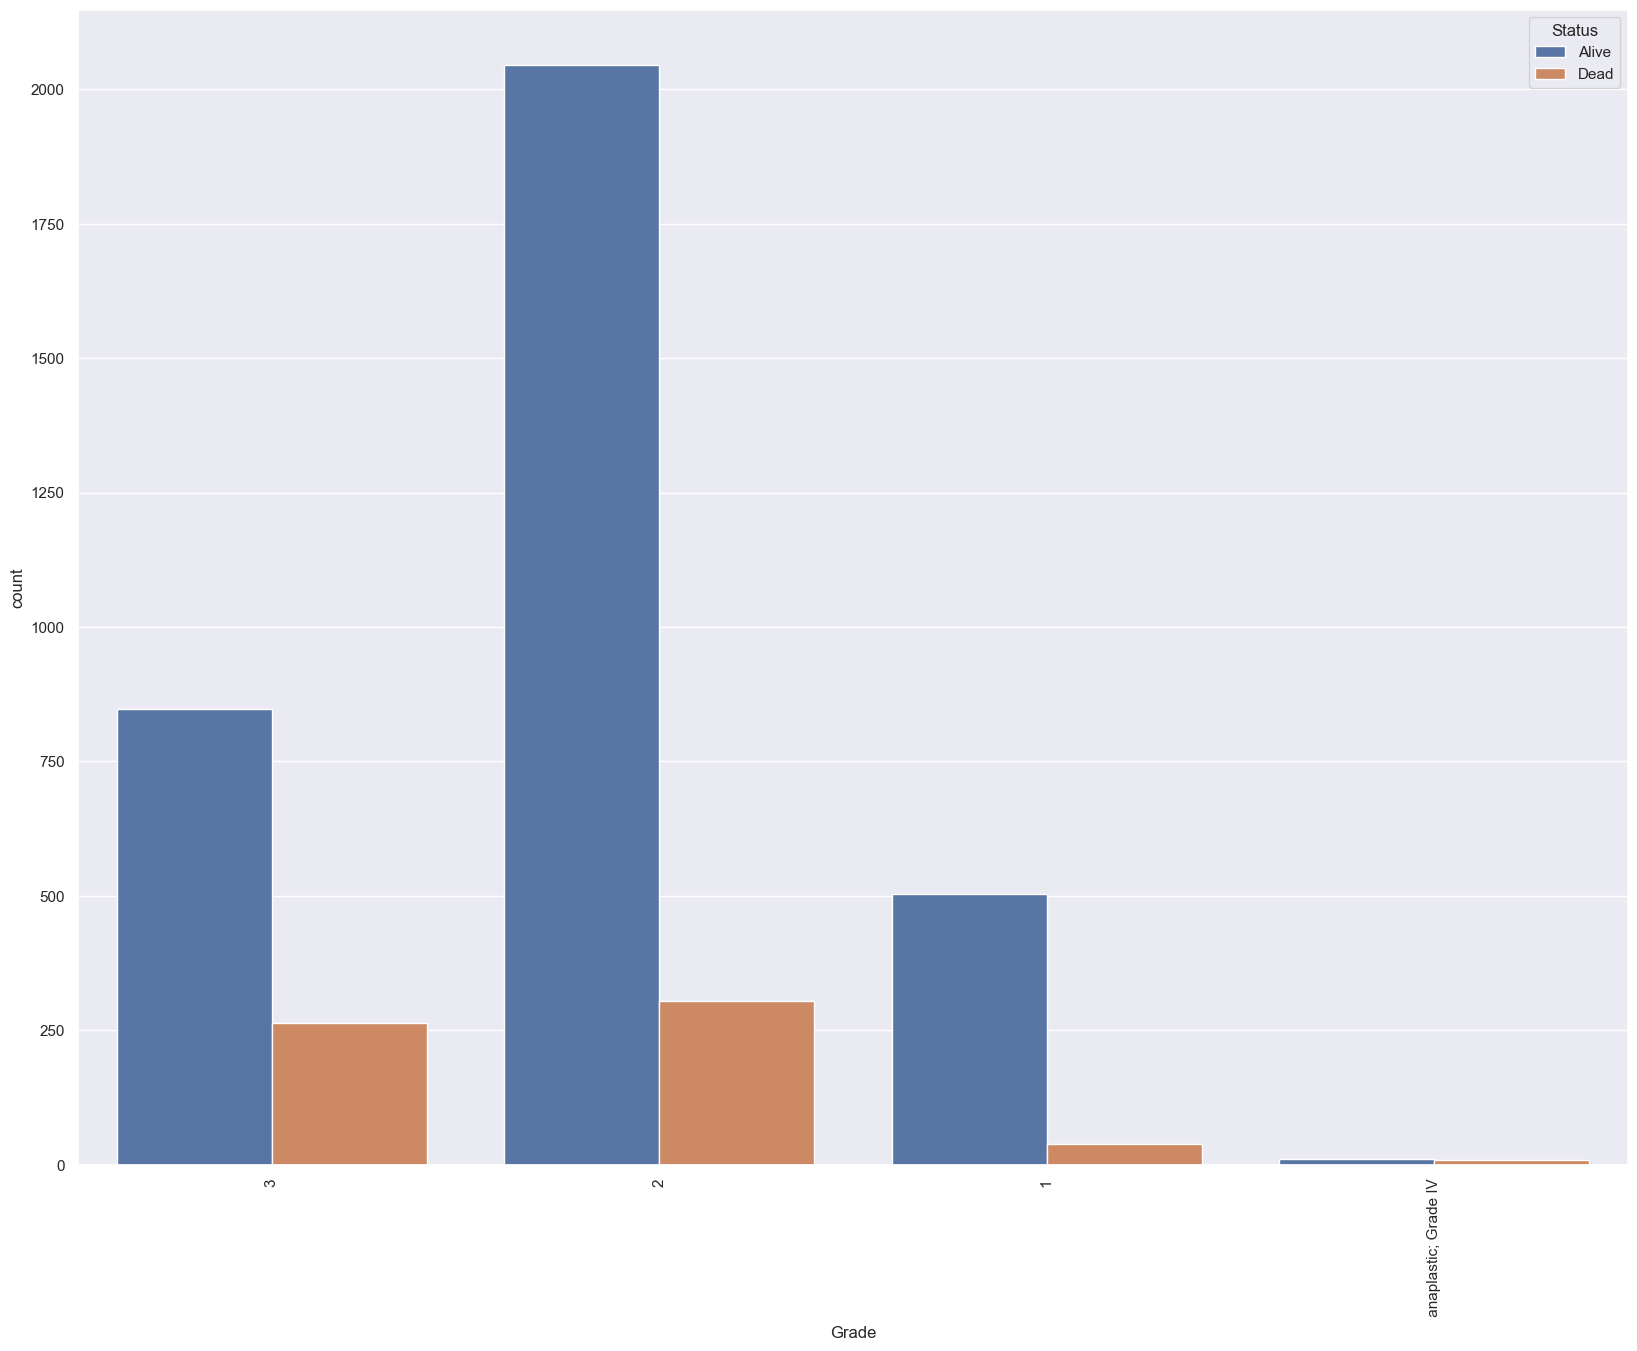

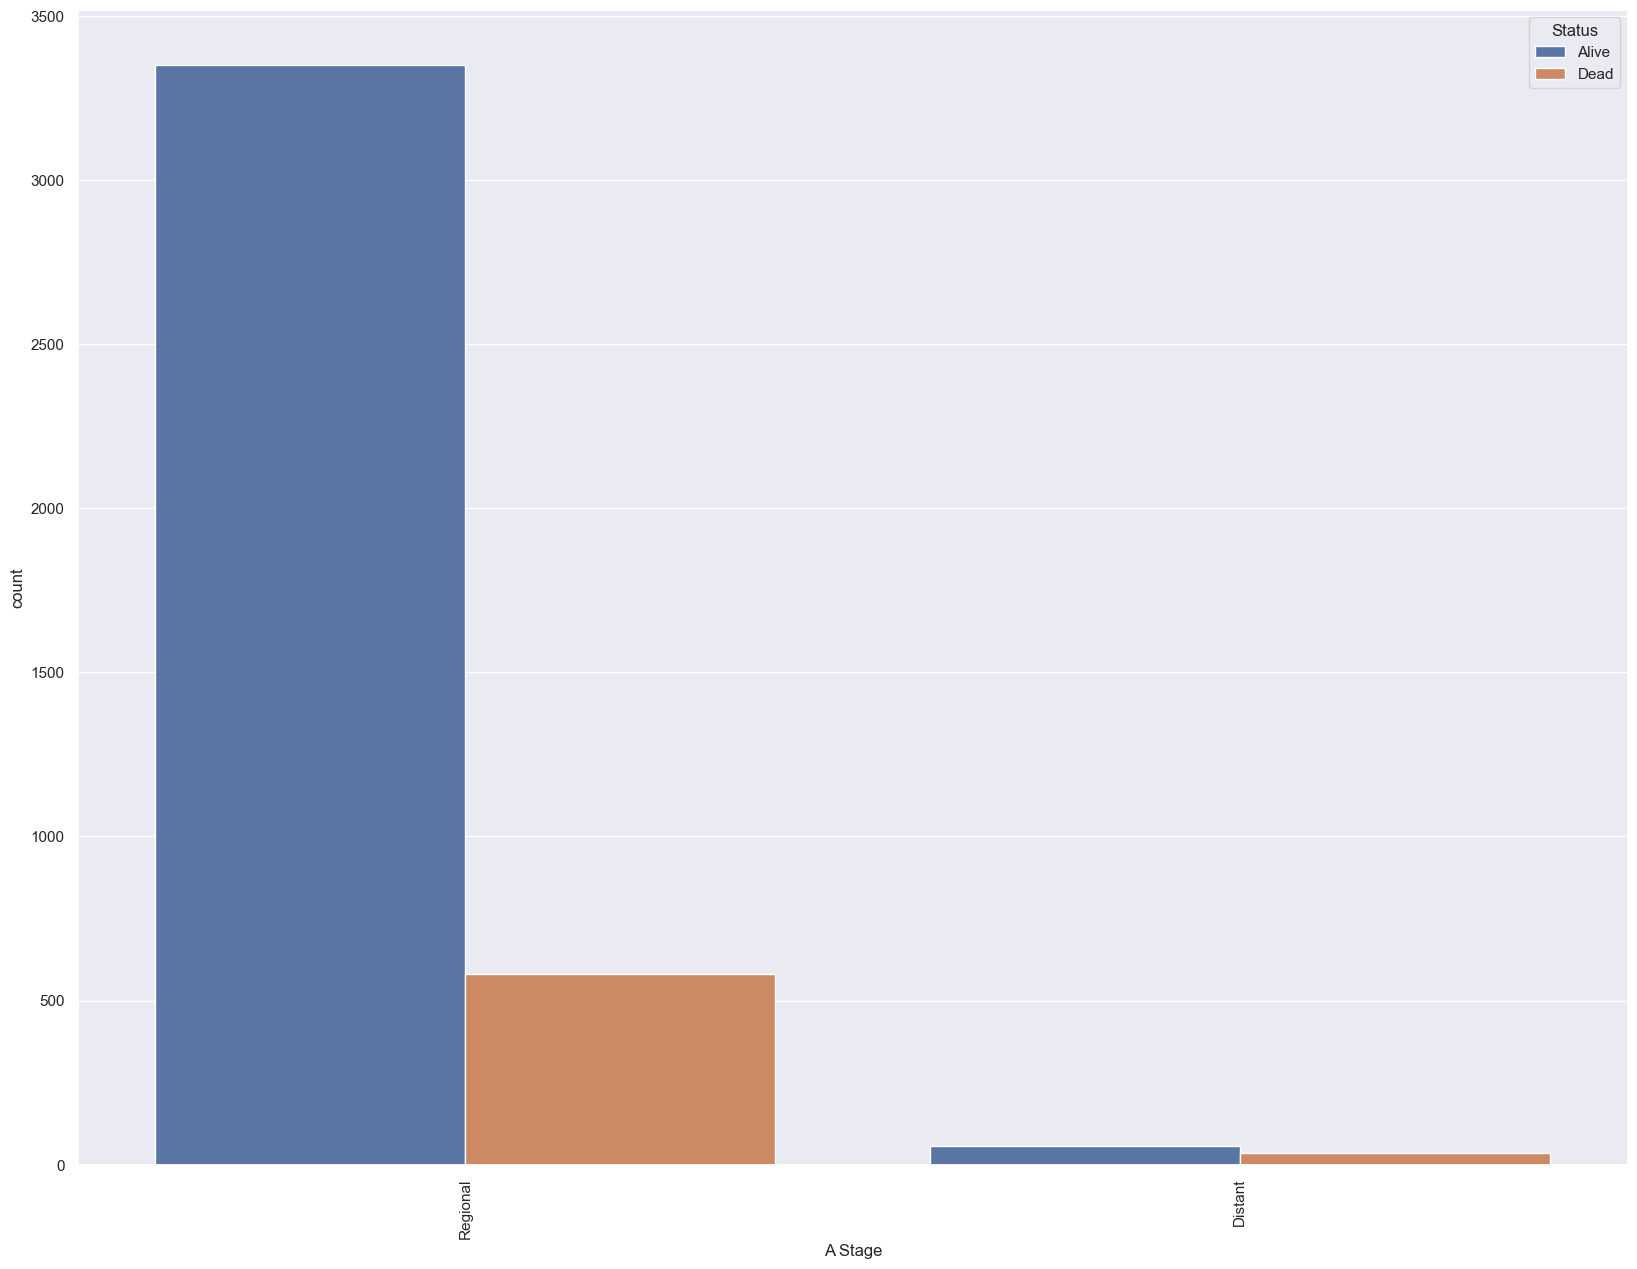

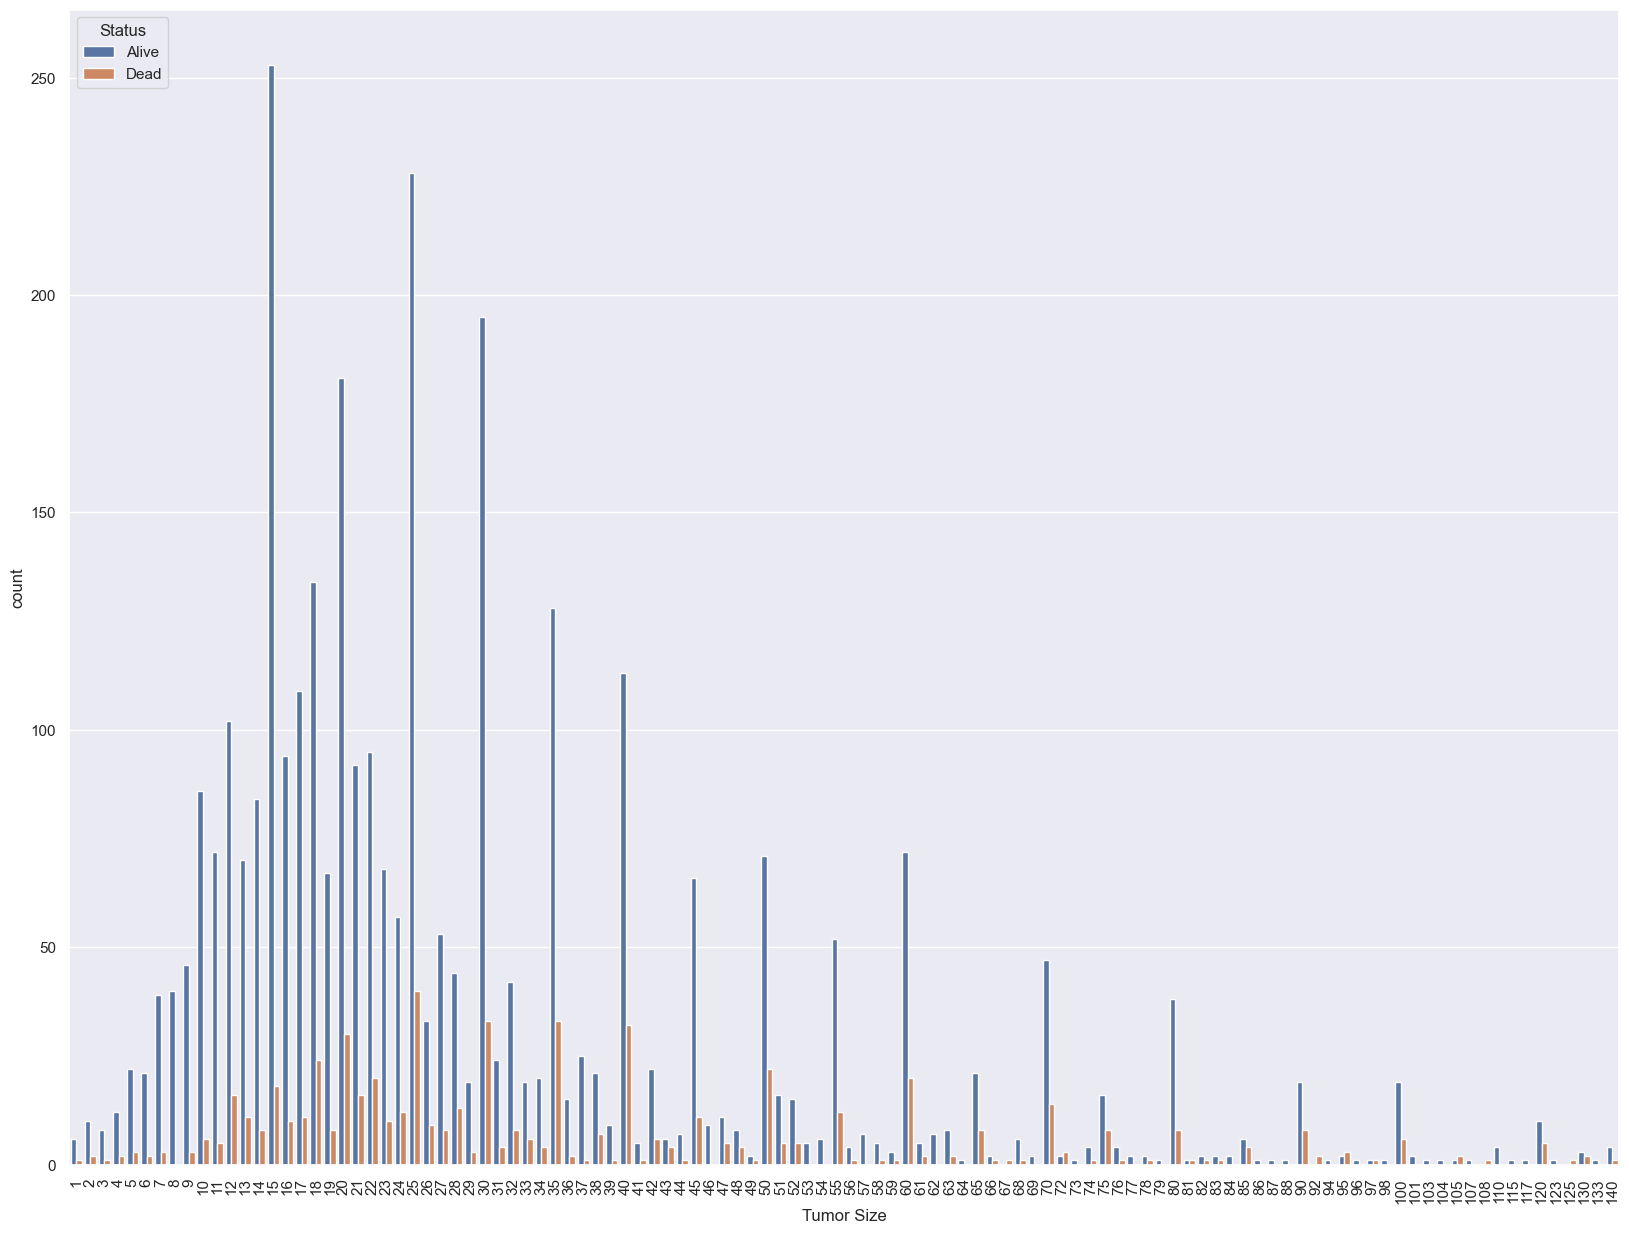

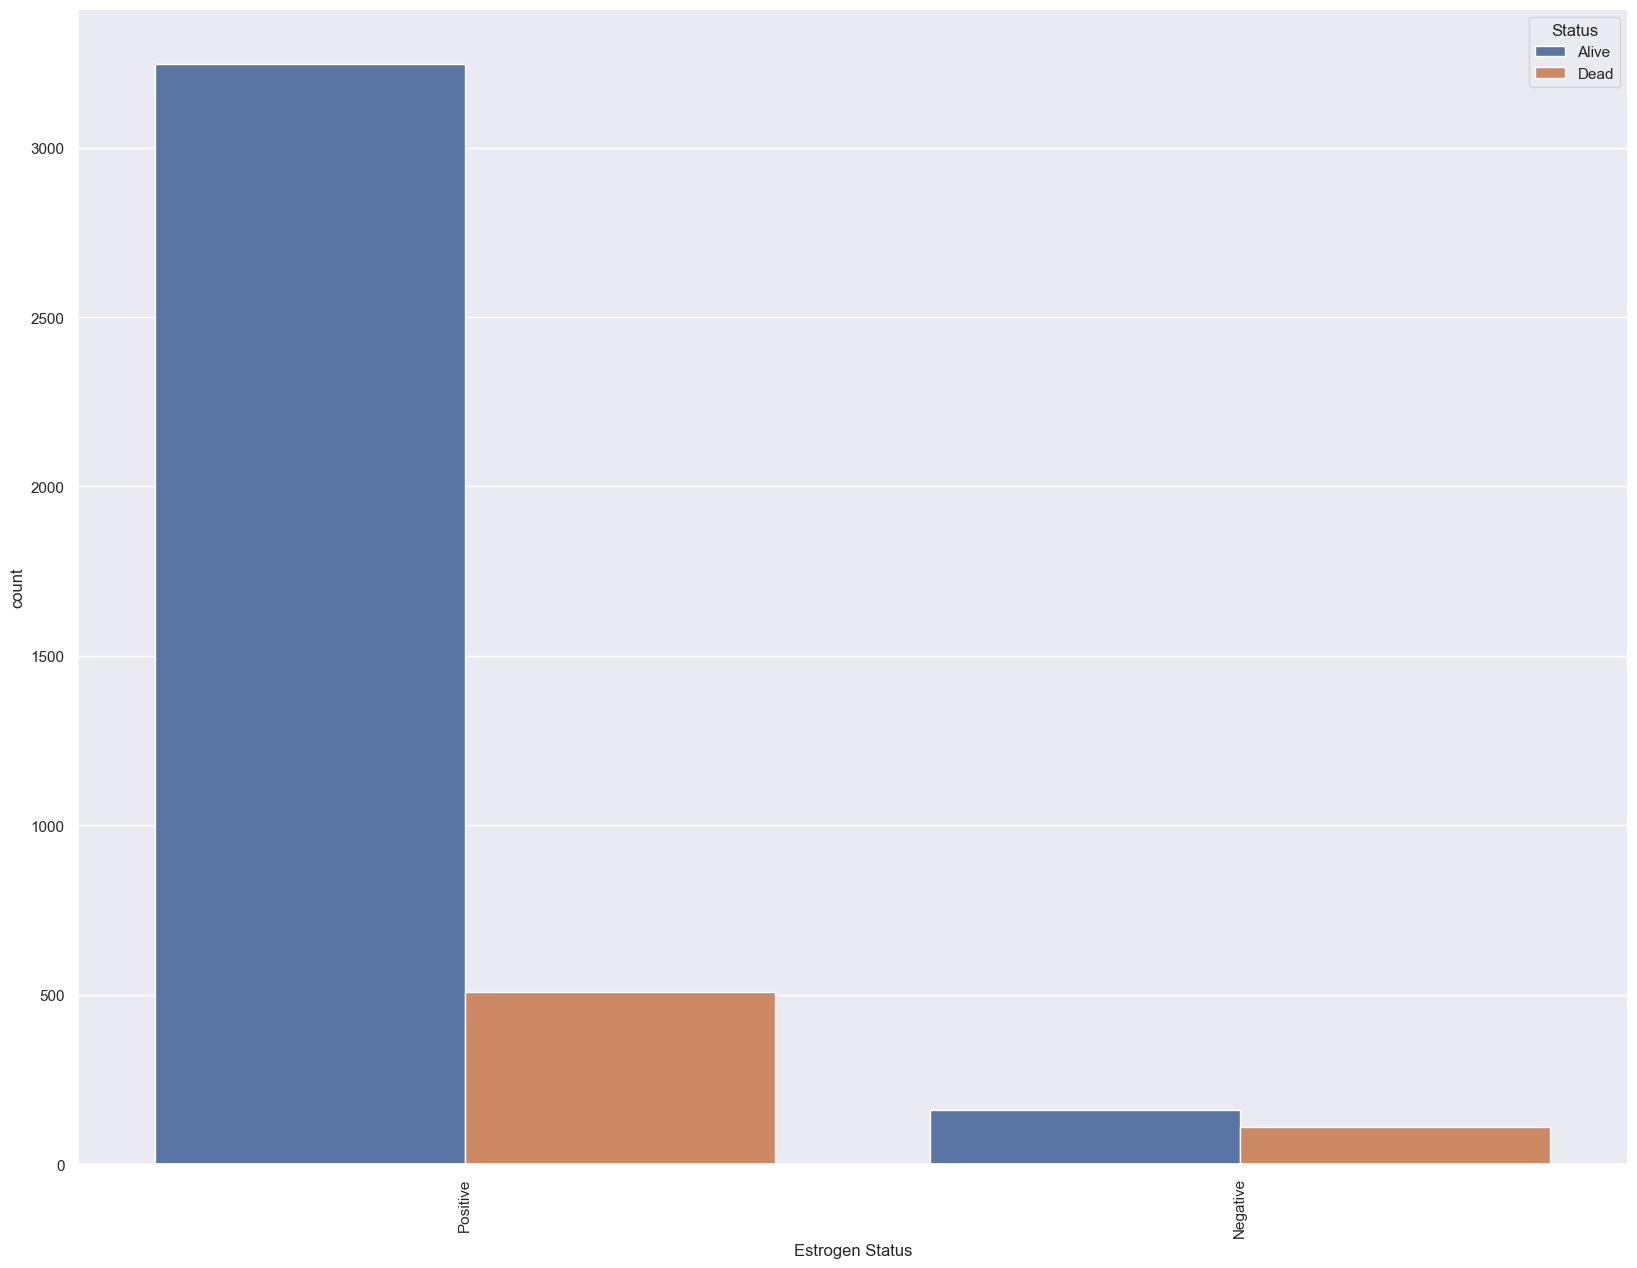

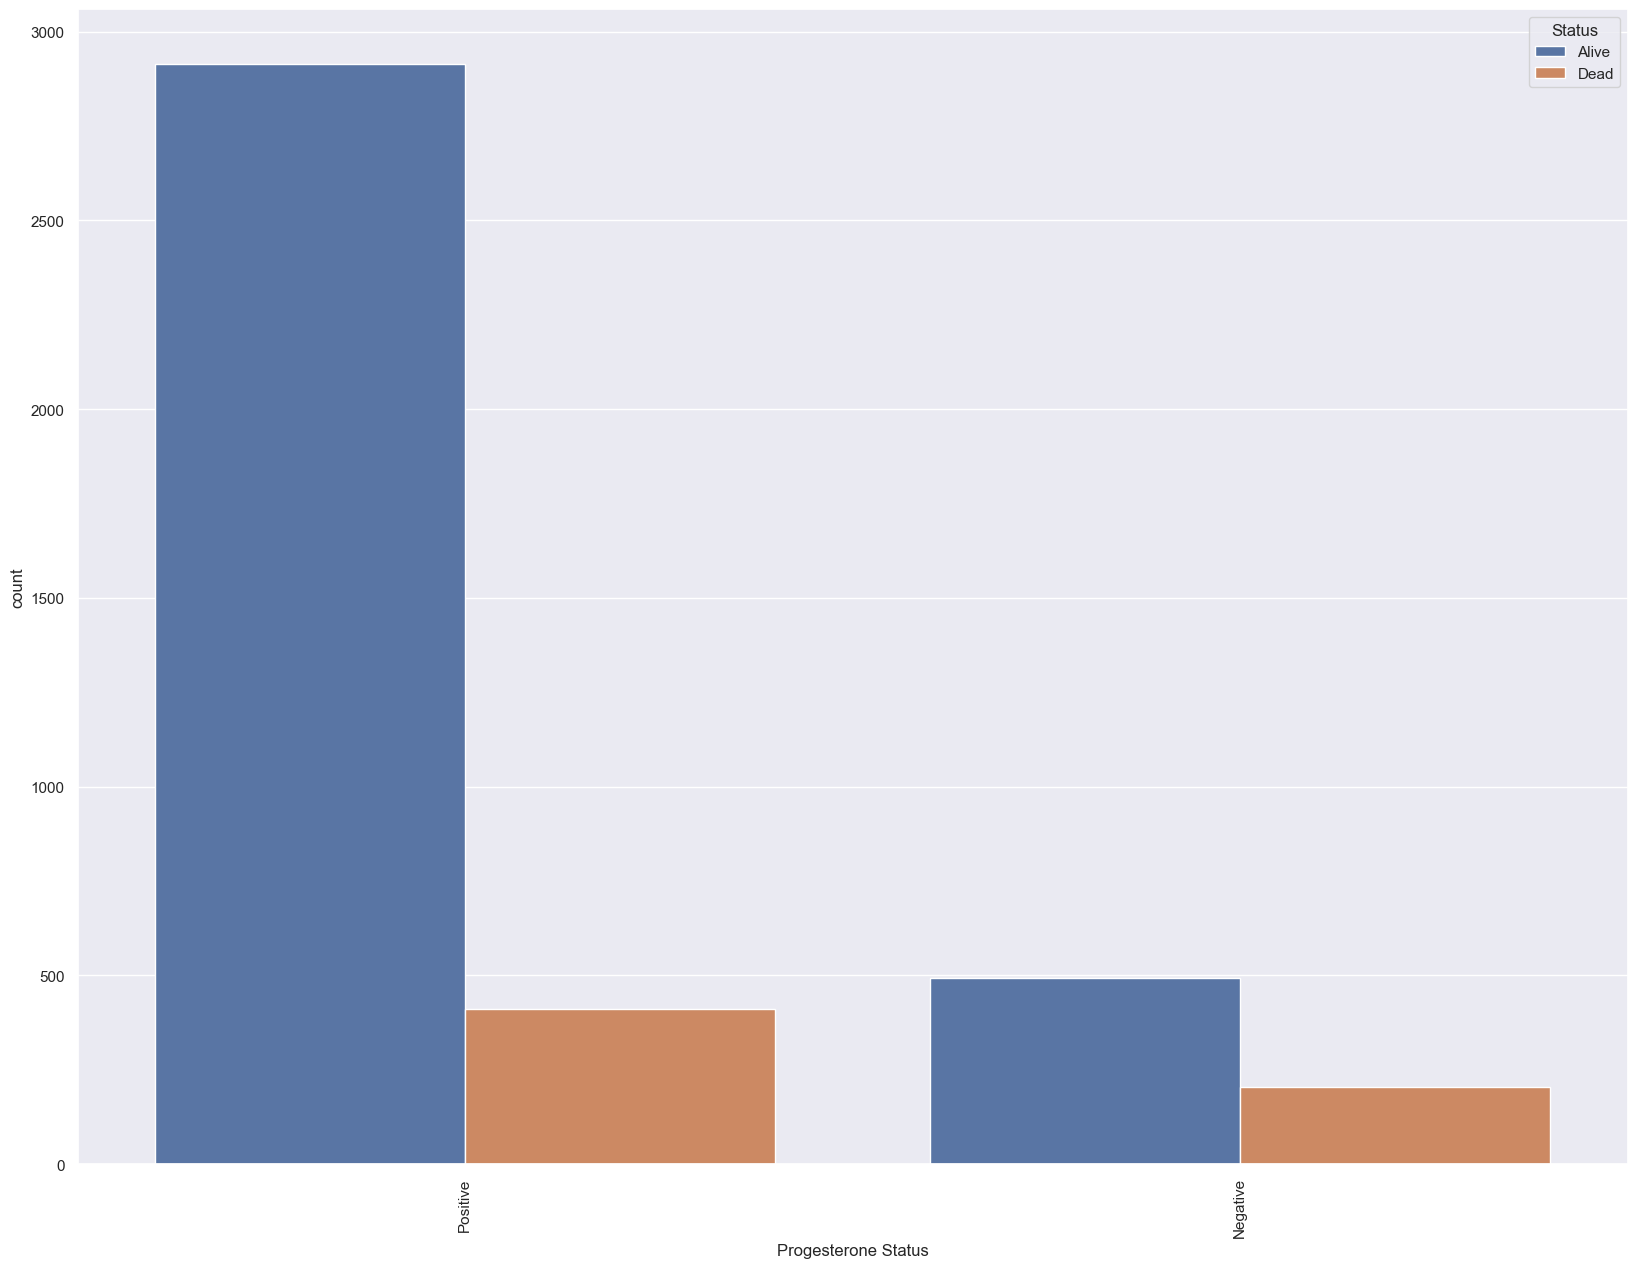

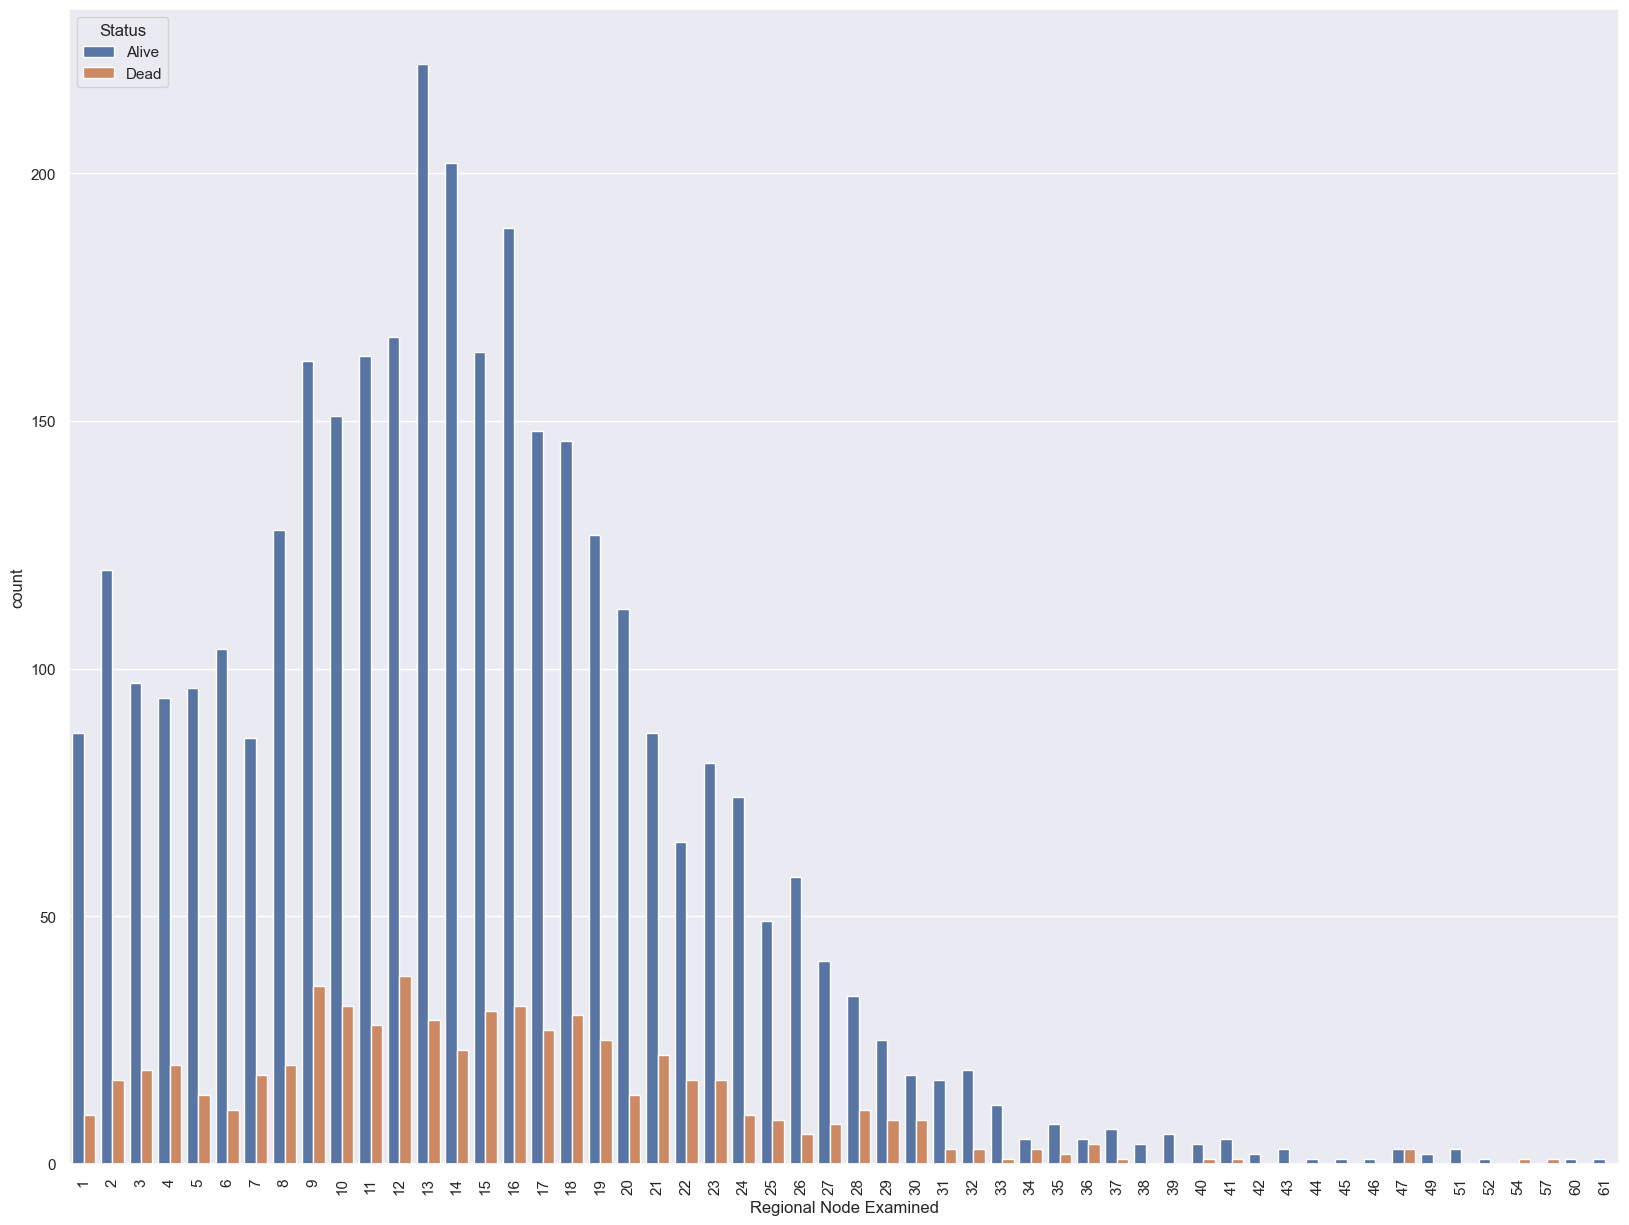

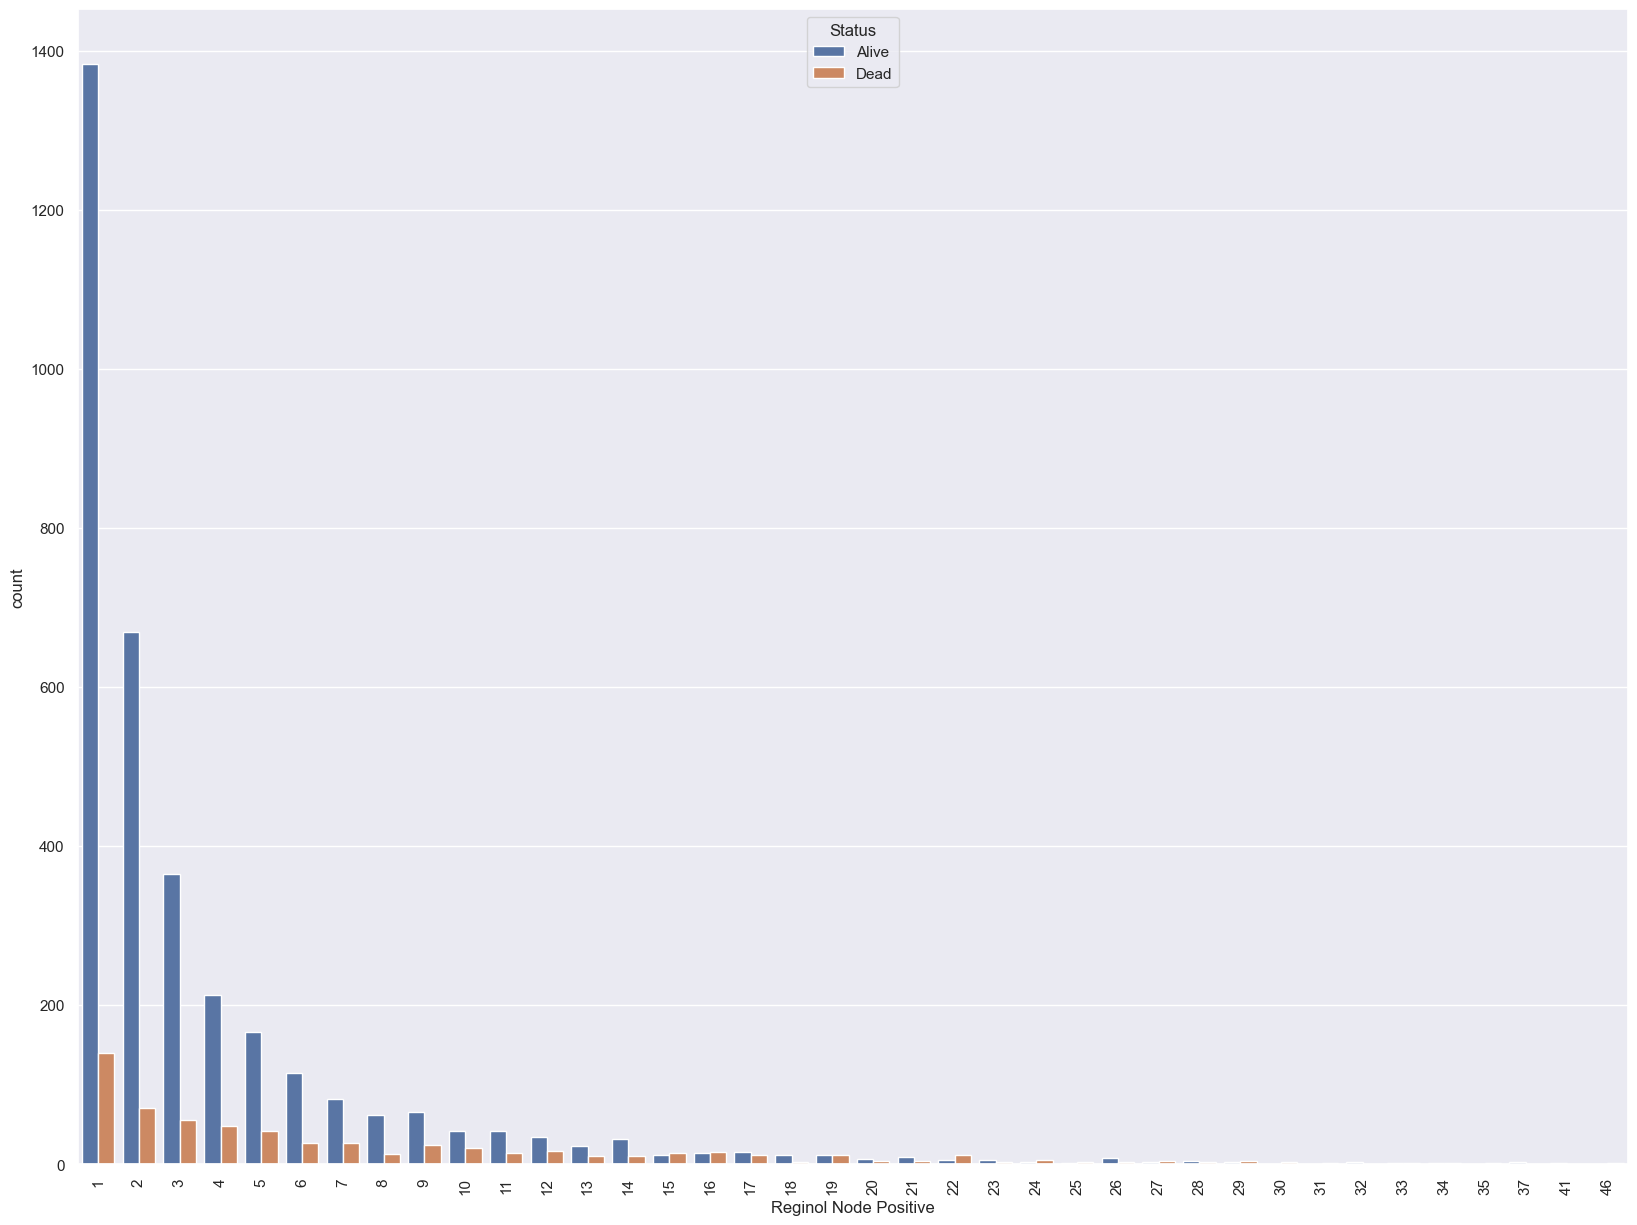

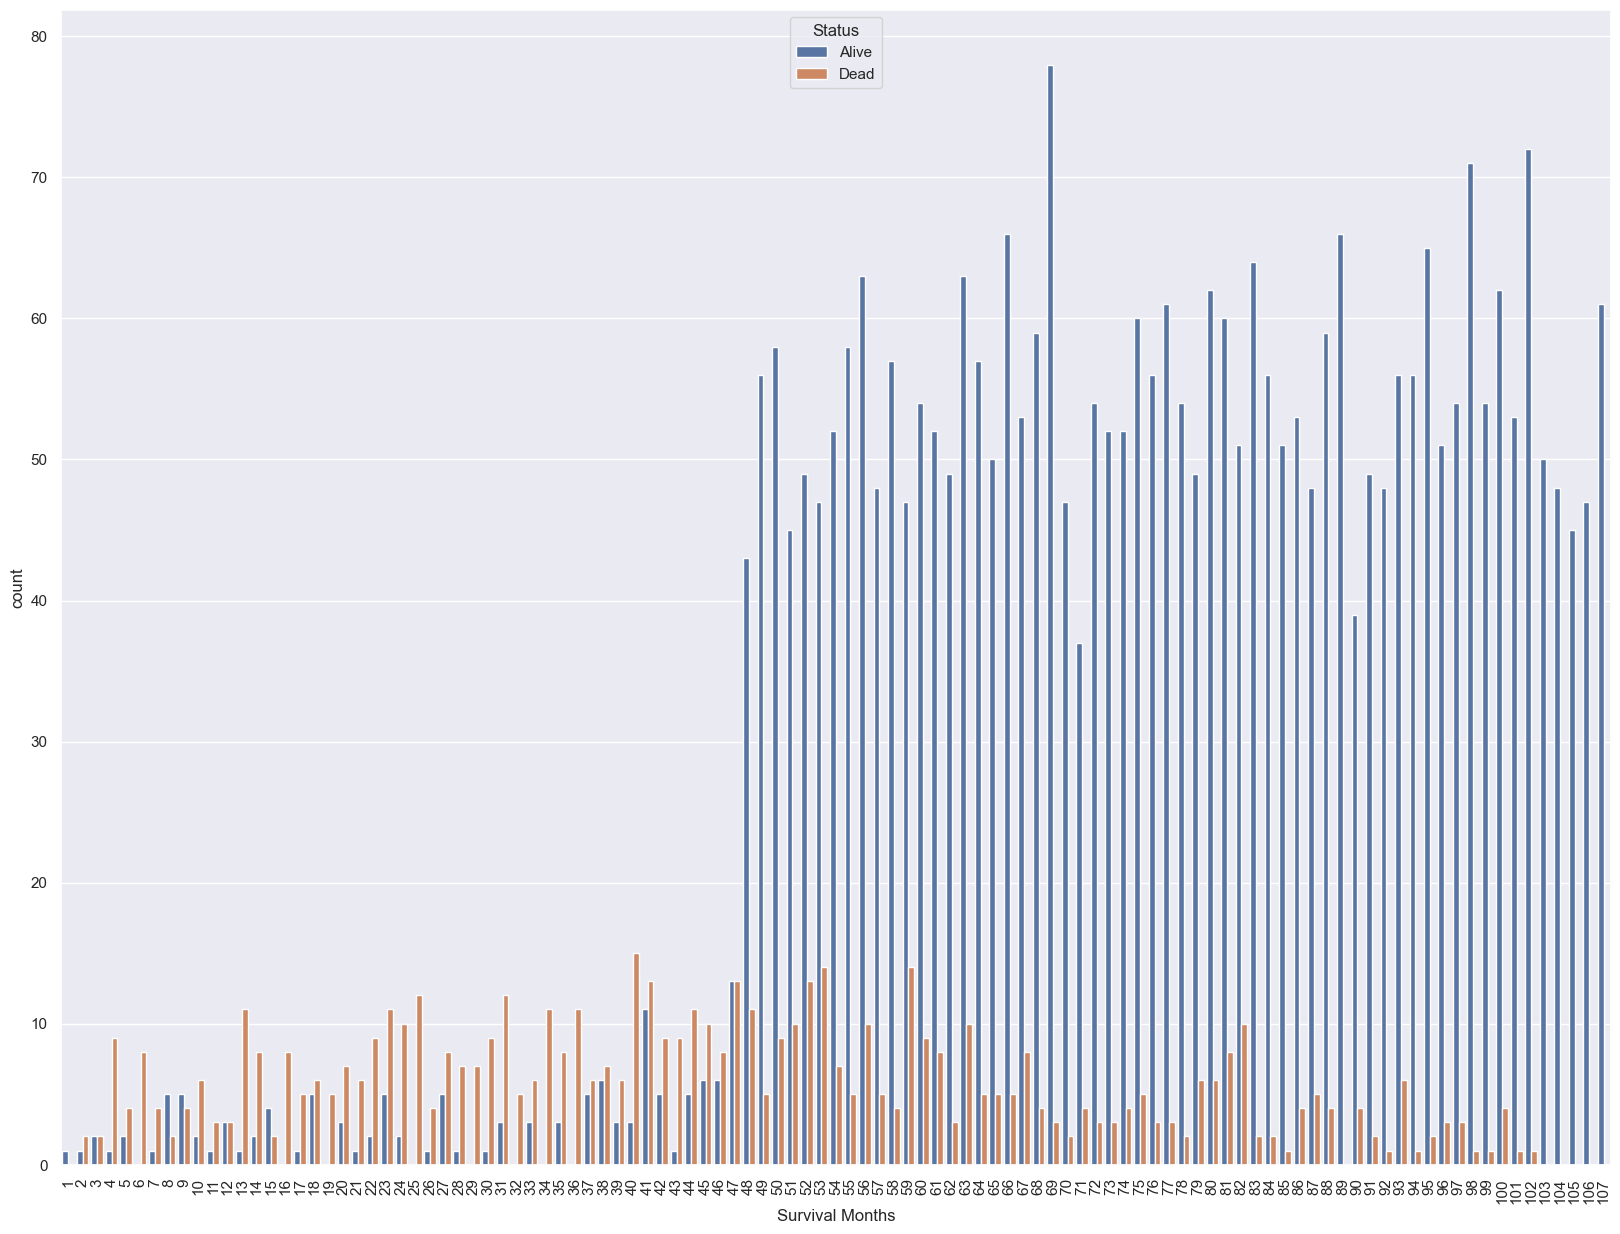

In [ ]:
dfc=df.drop('Status',axis=1)
for i in dfc.columns:
    countplot (df,i)

In [ ]:
#در اینجا یک کپی از دیتافریم اولی گرفتیم
df1=df.copy()

#میخوایم مقادیر غیر عددی هر ستون رو تبدیل به عدد کنیم تا قابل پردازش باشه
le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0      38     2               1         0        0          0              1   
1      20     2               1         1        1          2              0   
2      28     2               0         2        2          4              0   
3      28     2               1         0        0          0              1   
4      17     2               1         1        0          1              1   
...   ...   ...             ...       ...      ...        ...            ...   
4019   32     1               1         0        0          0              0   
4020   26     2               0         1        1          2              0   
4021   38     2               1         1        0          1              0   
4022   28     0               0         1        0          1              0   
4023   16     2               1         1        0          1              0   

      Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0         3        1           3                1                    1   
1         2        1          34                1                    1   
2         2        1          62                1                    1   
3         3        1          17                1                    1   
4         3        1          40                1                    1   
...     ...      ...         ...              ...                  ...   
4019      2        1           8                1                    1   
4020      2        1          45                1                    1   
4021      2        1          21                1                    0   
4022      2        1          43                1                    1   
4023      2        1          29                1                    1   

      Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                         23                      0               59       0  
1                         13                      4               61       0  
2                         13                      6               74       0  
3                          1                      0               83       0  
4                          2                      0               49       0  
...                      ...                    ...              ...     ...  
4019                       0                      0               48       0  
4020                      13                      7               68       0  
4021                      10                      2               68       0  
4022                      10                      0               71       0  
4023                       6                      1               99       0  

[4024 rows x 16 columns]

In [ ]:
fig = px.scatter(df1, 
                   x='mean texture', 
                   color='target',
                 size='mean texture',
                   template='simple_white', 
                   title='Cancer Mean Texture Spread',
                 labels={"Tumor Size": "Tumor Size", "Status":"Status"},
                hover_data=["target"])

fig.update_layout(xaxis_title="Tumor Size",yaxis_title=" ")

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status'] but received: mean texture

In [ ]:
#این برای گرفتن یه شماتیک کلی از داده های خود هست
temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

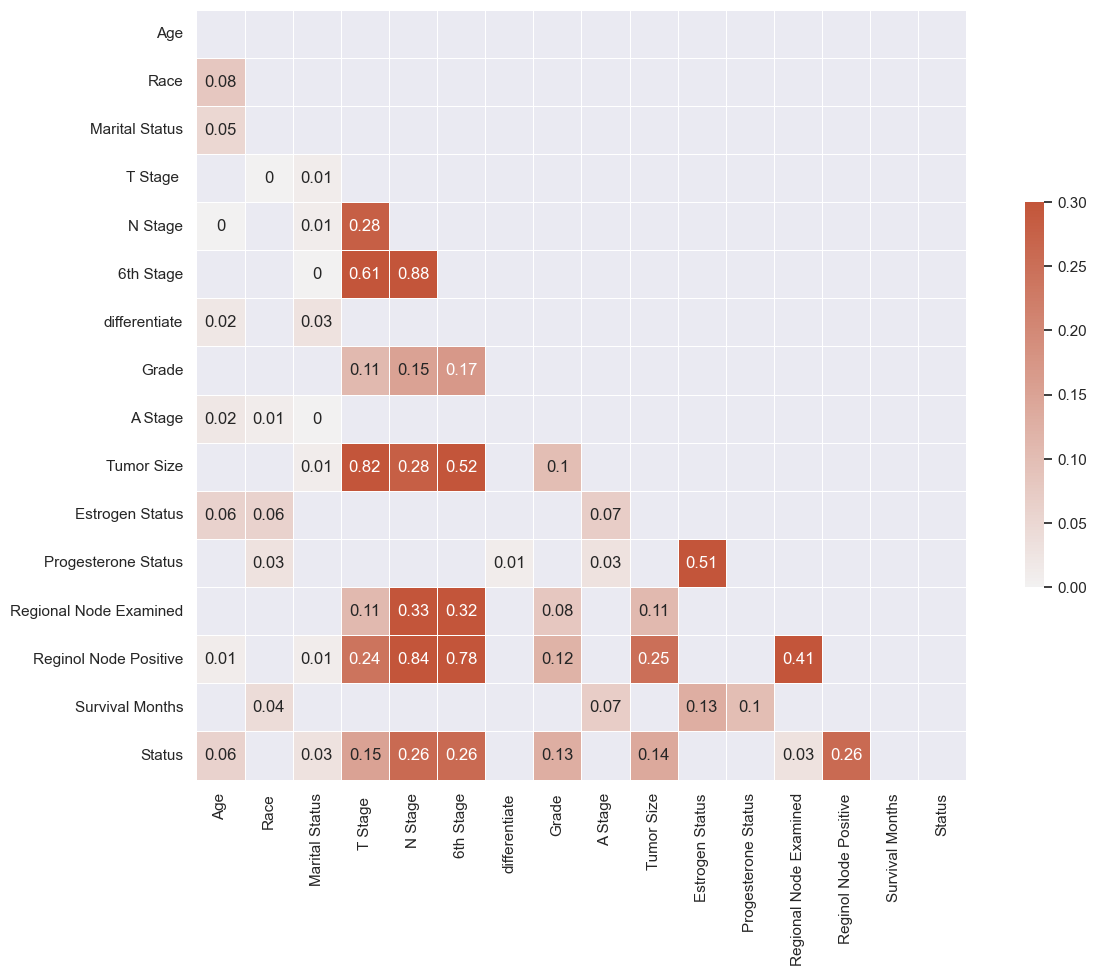

In [ ]:
#Correlation Heatmap showing only those values that have a positive correlation
corr = df1.corr()
corr = np.around(corr[corr > 0.0],2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

# Model Selection:

In [ ]:
df2=df1.copy()
y=df2.pop('Status').values
X=df2.values

In [ ]:
print (X.shape)
print (y.shape)

(4024, 15)
(4024,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

# Random Forest:

In [ ]:
rfmodel=RandomForestClassifier(n_estimators=600)

In [ ]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
y_pred=rfmodel.predict(X_test)

In [ ]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('jaccard_score: ',jaccard_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9255583126550868
recall_score:  0.5272727272727272
jaccard_score:  0.4915254237288136
f1_score:  0.6590909090909091
precision_score:  0.8787878787878788


# SVM:

In [ ]:
# With rbf Kernel

svcmodel=SVC(kernel='rbf',C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9255583126550868
recall_score:  0.4909090909090909
jaccard_score:  0.47368421052631576
f1_score:  0.6428571428571428
precision_score:  0.9310344827586207


In [ ]:
# With linear Kernel

svcmodel=SVC(kernel='linear')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9230769230769231
recall_score:  0.509090909090909
jaccard_score:  0.4745762711864407
f1_score:  0.6436781609195402
precision_score:  0.875


In [ ]:
# With poly Kernel


svcmodel=SVC(kernel='poly',degree=2,C=10)
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.9181141439205955
recall_score:  0.41818181818181815
jaccard_score:  0.4107142857142857
f1_score:  0.5822784810126582
precision_score:  0.9583333333333334


In [ ]:
# With sigmoid Kernel


svcmodel=SVC(kernel='sigmoid')
svcmodel.fit(X_train,y_train)
y_pred_scv=svcmodel.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred_scv))
print('recall_score: ',recall_score(y_test,y_pred_scv))
print('jaccard_score: ',jaccard_score(y_test,y_pred_scv))
print('f1_score: ',f1_score(y_test,y_pred_scv))
print('precision_score: ',precision_score(y_test,y_pred_scv))

fig = px.imshow(np.around(confusion_matrix(y_test, y_pred_scv, normalize='true'),2), 
                template='ggplot2',
                text_auto=True, 
                aspect="True", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

accuracy_score:  0.7965260545905707
recall_score:  0.2727272727272727
jaccard_score:  0.15463917525773196
f1_score:  0.26785714285714285
precision_score:  0.2631578947368421
